# Simple Data Analysis and Linear Regression Modelling

## The `housing` problem

We want to predict average house values in suburbs of Boston.

Accesible en https://archive.ics.uci.edu/ml/datasets/Housing

### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
import sklearn as skl
import seaborn as sns

from sklearn.datasets import load_boston

## Carga de datos

In [3]:
boston_data = load_boston()

df_housing = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df_housing['MEDV'] = boston_data['target']

print ("nFilas: %d\tnColumnas: %d\n" % (df_housing.shape[0], df_housing.shape[1]) )
print ("Columnas:\t", np.array(df_housing.columns))

nFilas: 506	nColumnas: 14

Columnas:	 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


## Visualización y correlaciones

### Boxplots

Boxplots, histogramas y visualizaciones sobre valores normalizados

In [4]:
df_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Boxplots and histograms

In [5]:
df_housing.std()

CRIM         8.596783
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
MEDV         9.197104
dtype: float64

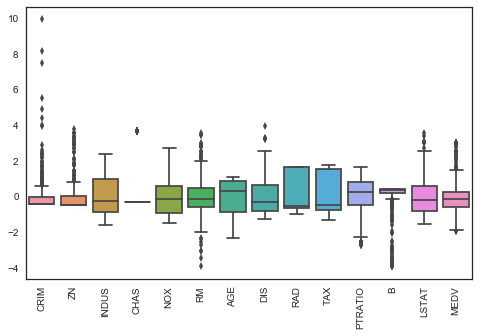

In [6]:
df_housing_normalizado = (df_housing - df_housing.mean()) / df_housing.std() #normalizar para tener rangos uniformes en histogramas

plt.figure( figsize=(8, 5))
sns.set_style("white")
bx_plot = sns.boxplot(data=df_housing_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.show()

### Histograms and scatterplots

Plot histograms of groups of 5 variables plus target.

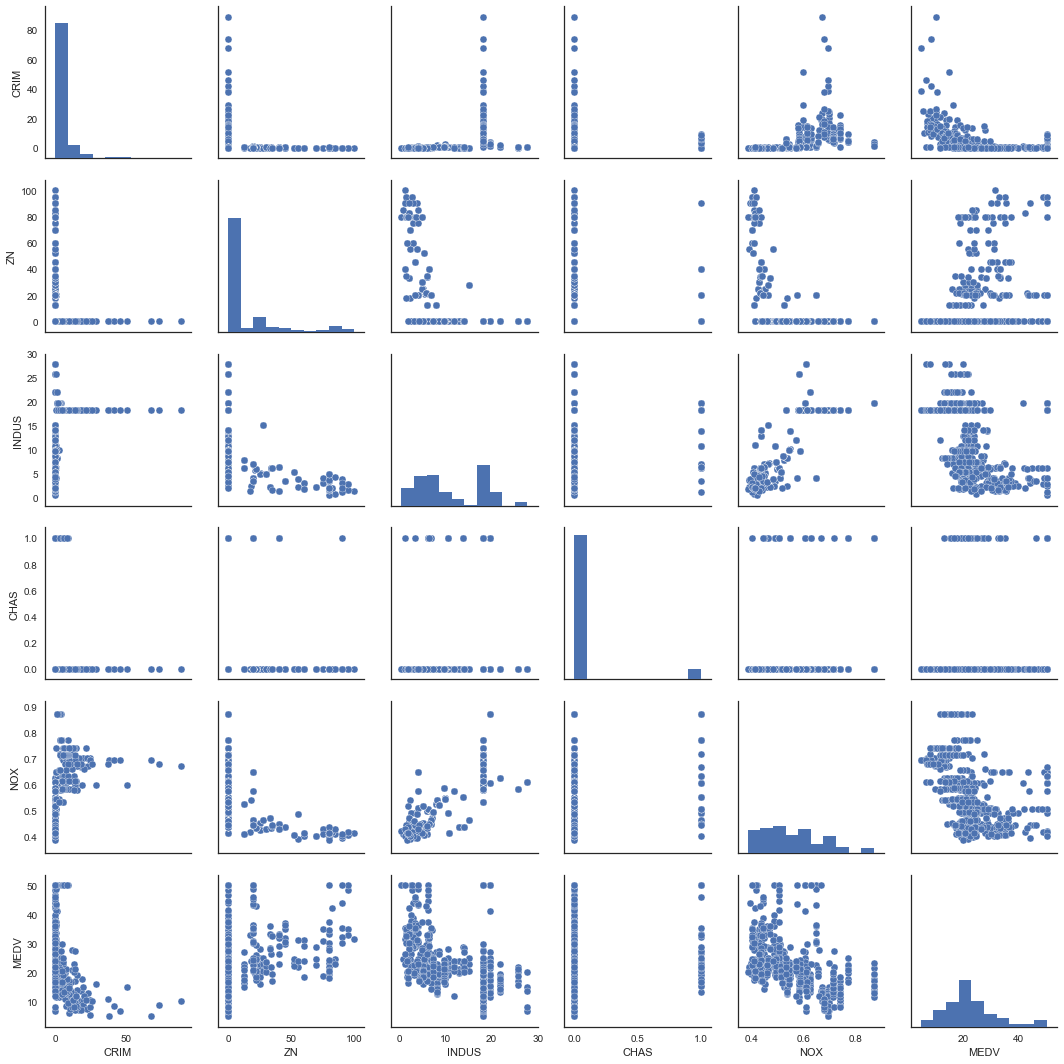

In [7]:
vars_housing   = df_housing.columns[ : -1]
target_housing = df_housing.columns[-1]

pair_plot = sns.pairplot( df_housing[ list(vars_housing[ : 5]) + [target_housing] ] )
plt.show()

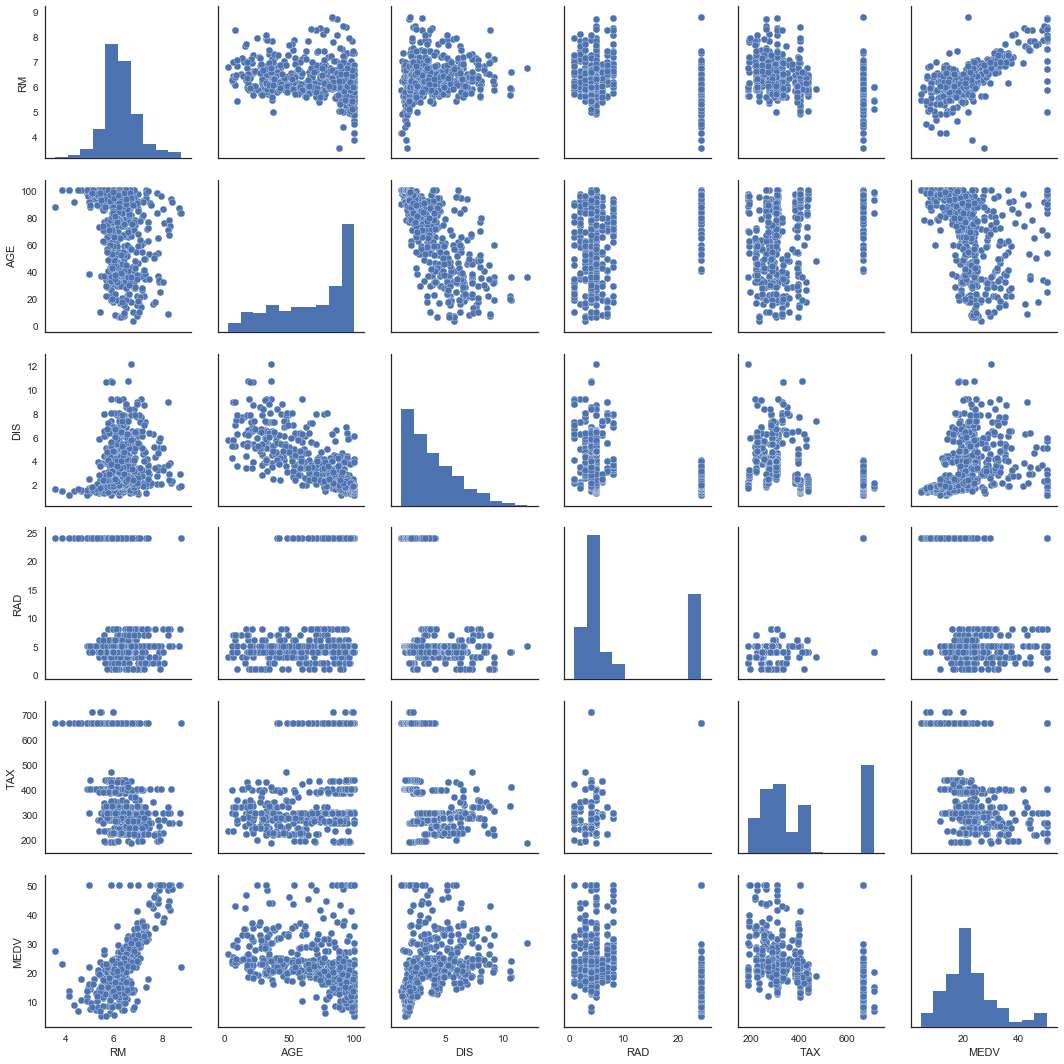

In [8]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 5: 10]) + [target_housing] ] )
plt.show()

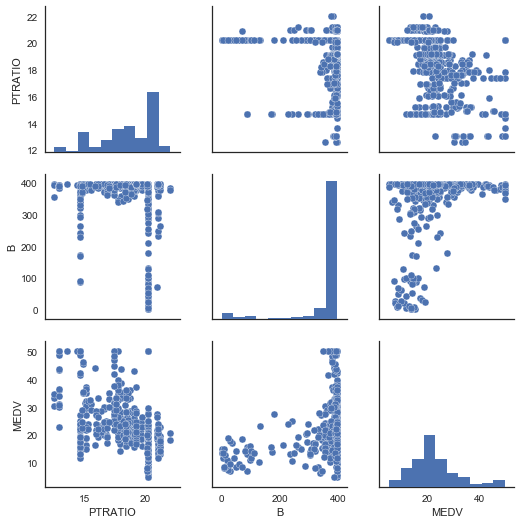

In [9]:
pair_plot = sns.pairplot( df_housing[ list(vars_housing[ 10: -1]) + [target_housing] ] )
plt.show()

### Correlations

In [10]:
df_housing.corr().round(decimals=3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


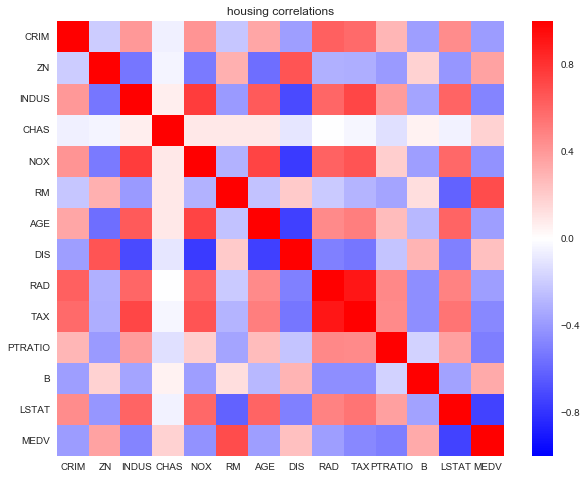

In [11]:
# correlation heatmap
plt.figure( figsize=(10, 8))
plt.title('housing correlations')
_ = sns.heatmap(df_housing.corr().values, vmin=-1., vmax=1., cmap='bwr', 
                xticklabels=list(df_housing.columns),
                yticklabels=list(df_housing.columns))

In [12]:
print( ( df_housing.corr()['MEDV'].abs().sort_values(ascending=False).T) )

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


## Ridge Regression

Just getting started ...

b: 22.532806


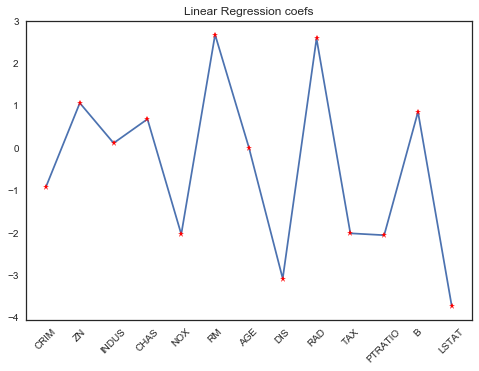

In [13]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

lr_m =  Ridge()

std_sc = StandardScaler()
x = std_sc.fit_transform( df_housing[ vars_housing ] )
y = df_housing[ target_housing ]

#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print("b: %f" % lr_m.intercept_)

nticks = len(lr_m.coef_)
plt.xticks(range(len(vars_housing)), vars_housing, rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_, '-', lr_m.coef_, 'r*')

MAE: 3.26947208082


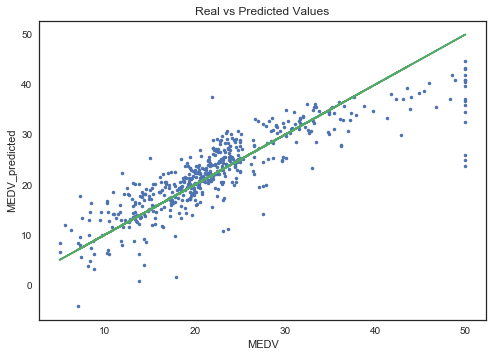

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr_m.predict(x)

print("MAE:", mean_absolute_error(y, y_pred))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

### Finding the optimal `alpha` by CV

 We select the ridge parameter `alpha` by CV

In [15]:
# select alpha in ridge regression by CV
# First iteration to find alpha
from sklearn.model_selection import KFold, GridSearchCV

n_folds = 10

# no shuffle 
kf = KFold(n_folds, shuffle=True)

l_alpha = [2.**k for k in range(-6, 10)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, param_grid=param_grid, cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=1, verbose=1)

ridge_alpha_search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

alfa = 32.00
best_cv_mae = 3.334


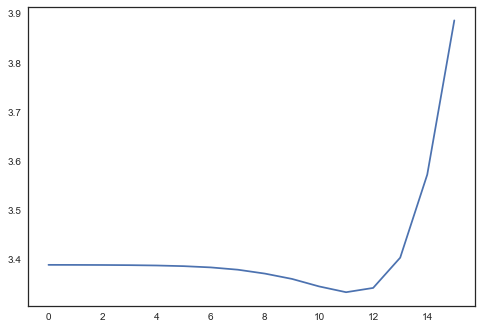

In [16]:
#dir(ridge_alpha_search)

print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

#plt.xticks(range(len(l_alpha)), l_alpha, rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

In [17]:
#Segunda iteración: recentramos alpha y refinamos la búsqueda
kf = KFold(n_folds, shuffle=True)

l_alpha = [2.**(k/2.) for k in range(0, 20)]
param_grid = {'alpha': l_alpha}


lr_m = Ridge()
ridge_alpha_search = GridSearchCV(lr_m, param_grid=param_grid, cv=kf, 
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=1, verbose=1)

#ridge_alpha_search = RidgeCV(alphas=np.array([ 0.01, 0.1, 1., 10., 100. ]))

ridge_alpha_search .fit(x, y)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.3s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1.0, 1.4142135623730951, 2.0, 2.8284271247461903, 4.0, 5.656854249492381, 8.0, 11.313708498984761, 16.0, 22.627416997969522, 32.0, 45.254833995939045, 64.0, 90.50966799187809, 128.0, 181.01933598375618, 256.0, 362.03867196751236, 512.0, 724.0773439350247]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

alfa = 32.00
best_cv_mae = 3.331


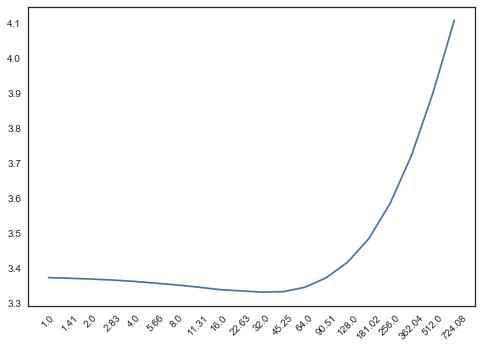

In [18]:
print('alfa = %.2f' % (ridge_alpha_search.best_params_['alpha']))
print('best_cv_mae = %.3f' % (-ridge_alpha_search.best_score_))

plt.xticks(range(len(l_alpha)), np.round(l_alpha, 2), rotation=45)
_ = plt.plot( -ridge_alpha_search.cv_results_['mean_test_score'])

### Testing the final model

MAE: 3.23516068162


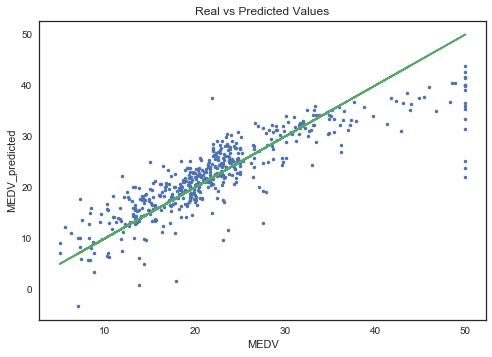

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_alpha = ridge_alpha_search.best_params_['alpha']

lr_m = Ridge(alpha=best_alpha)
lr_m.fit(x, y)

y_pred = lr_m.predict(x)

print("MAE:", mean_absolute_error(y, y_pred))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

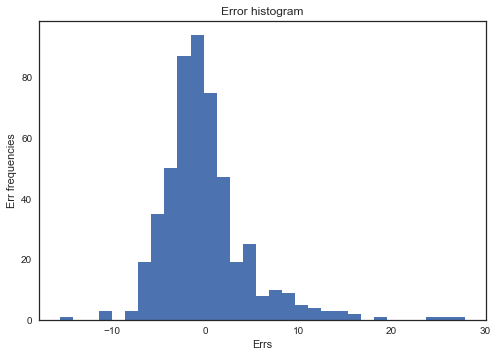

In [20]:
errs = y - y_pred

plt.title("Error histogram")
plt.xlabel("Errs")
plt.ylabel("Err frequencies")
_ = plt.hist(errs, bins=31)

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_m, x, y, scoring="neg_mean_absolute_error", cv=kf)

In [22]:
scores

array([-3.17075891, -3.13264229, -3.30352756, -3.70794193, -3.23576702,
       -2.5645227 , -3.22885145, -3.73619696, -3.26804039, -3.76583627])

In [23]:
print("mae_mean", -scores.mean(), "mae_std", scores.std())

mae_mean 3.31140854803 mae_std 0.34179626386
